In [4]:
# Análise Exploratória de Dados - Dataset de Diabetes
# Objetivo: Obter insights para preparação dos dados para treinamento de modelo de ML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configurações
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Bibliotecas importadas com sucesso!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")


Bibliotecas importadas com sucesso!
Pandas version: 2.3.2
NumPy version: 2.3.3
Seaborn version: 0.13.2


In [5]:
# Carregamento dos dados
df = pd.read_csv('../data/raw/diabetes_dataset.csv')

print("="*60)
print("INFORMAÇÕES BÁSICAS DO DATASET")
print("="*60)
print(f"Shape do dataset: {df.shape}")
print(f"Número de linhas: {df.shape[0]:,}")
print(f"Número de colunas: {df.shape[1]}")
print(f"Tamanho em memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*60)
print("PRIMEIRAS 5 LINHAS")
print("="*60)
df.head()


INFORMAÇÕES BÁSICAS DO DATASET
Shape do dataset: (100000, 31)
Número de linhas: 100,000
Número de colunas: 31
Tamanho em memória: 55.81 MB

PRIMEIRAS 5 LINHAS


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,7.9,7.9,0,0,0,30.5,0.89,134,78,68,239,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,6.5,8.7,0,0,0,23.1,0.80,129,76,67,116,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,10.0,8.1,1,0,0,22.2,0.81,115,73,74,213,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,6.6,5.2,0,0,0,26.8,0.88,120,93,68,171,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,7.4,5.0,0,0,0,21.2,0.78,92,67,67,210,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [6]:
# Análise de informações gerais
print("="*60)
print("INFORMAÇÕES DETALHADAS DO DATASET")
print("="*60)

print("\n1. TIPOS DE DADOS:")
print("-" * 30)
print(df.dtypes.value_counts())

print("\n2. INFORMAÇÕES SOBRE VALORES NULOS:")
print("-" * 30)
null_info = pd.DataFrame({
    'Coluna': df.columns,
    'Valores_Nulos': df.isnull().sum(),
    'Percentual_Nulos': (df.isnull().sum() / len(df)) * 100,
    'Tipo_Dados': df.dtypes
})
print(null_info[null_info['Valores_Nulos'] > 0].sort_values('Valores_Nulos', ascending=False))

print("\n3. COLUNAS COM VALORES ÚNICOS:")
print("-" * 30)
unique_counts = df.nunique().sort_values()
print(unique_counts)

print("\n4. INFORMAÇÕES GERAIS:")
print("-" * 30)
df.info()


INFORMAÇÕES DETALHADAS DO DATASET

1. TIPOS DE DADOS:
------------------------------
int64      16
float64     8
object      7
Name: count, dtype: int64

2. INFORMAÇÕES SOBRE VALORES NULOS:
------------------------------
Empty DataFrame
Columns: [Coluna, Valores_Nulos, Percentual_Nulos, Tipo_Dados]
Index: []

3. COLUNAS COM VALORES ÚNICOS:
------------------------------
cardiovascular_history                   2
family_history_diabetes                  2
hypertension_history                     2
diagnosed_diabetes                       2
smoking_status                           3
gender                                   3
education_level                          4
employment_status                        4
ethnicity                                5
income_level                             5
diabetes_stage                           5
alcohol_consumption_per_week            11
waist_to_hip_ratio                      40
diastolic_bp                            60
heart_rate               

In [7]:
# Identificação de variáveis numéricas e categóricas
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("="*60)
print("CLASSIFICAÇÃO DAS VARIÁVEIS")
print("="*60)
print(f"Variáveis numéricas ({len(numeric_columns)}): {numeric_columns}")
print(f"\nVariáveis categóricas ({len(categorical_columns)}): {categorical_columns}")

print("\n" + "="*60)
print("ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS")
print("="*60)
desc_stats = df[numeric_columns].describe()
print(desc_stats.round(2))


CLASSIFICAÇÃO DAS VARIÁVEIS
Variáveis numéricas (24): ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score', 'diagnosed_diabetes']

Variáveis categóricas (7): ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'diabetes_stage']

ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS
             age  alcohol_consumption_per_week  \
count  100000.00                     100000.00   
mean       50.12                          2.00   
std        15.60                          1.42   
min        18.00                          0.00   
25%        39.00   

In [8]:
# Análise adicional das variáveis numéricas
print("="*60)
print("ANÁLISE DE DISTRIBUIÇÃO - VARIÁVEIS NUMÉRICAS")
print("="*60)

# Calcular skewness e kurtosis
distribution_analysis = pd.DataFrame({
    'Coluna': numeric_columns,
    'Skewness': [stats.skew(df[col].dropna()) for col in numeric_columns],
    'Kurtosis': [stats.kurtosis(df[col].dropna()) for col in numeric_columns],
    'CV': [df[col].std() / df[col].mean() for col in numeric_columns]  # Coeficiente de variação
})

distribution_analysis['Distribuicao'] = distribution_analysis['Skewness'].apply(
    lambda x: 'Normal' if abs(x) < 0.5 else 'Assimétrica' if abs(x) < 1 else 'Muito Assimétrica'
)

print(distribution_analysis.round(3))

print("\n" + "="*60)
print("ANÁLISE DE VARIABILIDADE")
print("="*60)
print("Coeficiente de Variação (CV = std/mean):")
print("- CV < 0.1: Baixa variabilidade")
print("- 0.1 ≤ CV < 0.3: Média variabilidade") 
print("- CV ≥ 0.3: Alta variabilidade")

high_variability = distribution_analysis[distribution_analysis['CV'] >= 0.3]
print(f"\nVariáveis com alta variabilidade (CV ≥ 0.3): {len(high_variability)}")
if len(high_variability) > 0:
    print(high_variability[['Coluna', 'CV']].round(3))


ANÁLISE DE DISTRIBUIÇÃO - VARIÁVEIS NUMÉRICAS
                                Coluna  Skewness  Kurtosis     CV  \
0                                  age     0.083    -0.388  0.311   
1         alcohol_consumption_per_week     0.703     0.452  0.708   
2   physical_activity_minutes_per_week     1.390     2.812  0.710   
3                           diet_score    -0.070    -0.220  0.297   
4                  sleep_hours_per_day    -0.013    -0.112  0.156   
5            screen_time_hours_per_day     0.083    -0.177  0.412   
6              family_history_diabetes     1.356    -0.161  1.886   
7                 hypertension_history     1.150    -0.678  1.728   
8               cardiovascular_history     3.116     7.712  3.410   
9                                  bmi     0.006    -0.057  0.140   
10                  waist_to_hip_ratio     0.006    -0.014  0.055   
11                         systolic_bp     0.219    -0.318  0.123   
12                        diastolic_bp     0.007    -0.03

In [9]:
# Análise das variáveis categóricas
print("="*60)
print("ANÁLISE DAS VARIÁVEIS CATEGÓRICAS")
print("="*60)

for col in categorical_columns:
    print(f"\n{col.upper()}:")
    print("-" * 40)
    value_counts = df[col].value_counts()
    print(f"Número de categorias: {len(value_counts)}")
    print(f"Valores únicos: {df[col].nunique()}")
    print("\nDistribuição:")
    print(value_counts.head(10))  # Mostra as 10 categorias mais frequentes
    
    if len(value_counts) > 10:
        print(f"... e mais {len(value_counts) - 10} categorias")
    
    # Calcular percentuais
    percentages = (value_counts / len(df)) * 100
    print(f"\nPercentuais das principais categorias:")
    print(percentages.head(5).round(2))
    
    print("\n" + "="*50)


ANÁLISE DAS VARIÁVEIS CATEGÓRICAS

GENDER:
----------------------------------------
Número de categorias: 3
Valores únicos: 3

Distribuição:
gender
Female    50216
Male      47771
Other      2013
Name: count, dtype: int64

Percentuais das principais categorias:
gender
Female    50.22
Male      47.77
Other      2.01
Name: count, dtype: float64


ETHNICITY:
----------------------------------------
Número de categorias: 5
Valores únicos: 5

Distribuição:
ethnicity
White       44997
Hispanic    20103
Black       17986
Asian       11865
Other        5049
Name: count, dtype: int64

Percentuais das principais categorias:
ethnicity
White       45.00
Hispanic    20.10
Black       17.99
Asian       11.86
Other        5.05
Name: count, dtype: float64


EDUCATION_LEVEL:
----------------------------------------
Número de categorias: 4
Valores únicos: 4

Distribuição:
education_level
Highschool      44891
Graduate        35037
Postgraduate    14972
No formal        5100
Name: count, dtype: int64

Pe

In [10]:
# Análise da variável target
print("="*60)
print("ANÁLISE DA VARIÁVEL TARGET")
print("="*60)

# Verificar se temos as colunas de diabetes
diabetes_columns = [col for col in df.columns if 'diabetes' in col.lower()]
print(f"Colunas relacionadas ao diabetes: {diabetes_columns}")

for col in diabetes_columns:
    print(f"\n{col.upper()}:")
    print("-" * 40)
    
    if df[col].dtype == 'object':
        # Variável categórica
        value_counts = df[col].value_counts()
        percentages = (value_counts / len(df)) * 100
        
        print("Distribuição:")
        for value, count in value_counts.items():
            print(f"  {value}: {count:,} ({percentages[value]:.2f}%)")
            
    else:
        # Variável numérica
        print(f"Tipo: Numérica")
        print(f"Valores únicos: {df[col].nunique()}")
        print(f"Valores: {sorted(df[col].unique())}")
        
        value_counts = df[col].value_counts().sort_index()
        percentages = (value_counts / len(df)) * 100
        
        print("Distribuição:")
        for value, count in value_counts.items():
            print(f"  {value}: {count:,} ({percentages[value]:.2f}%)")

# Análise de balanceamento da classe
if 'diagnosed_diabetes' in df.columns:
    print(f"\n" + "="*60)
    print("ANÁLISE DE BALANCEAMENTO DA CLASSE")
    print("="*60)
    
    class_distribution = df['diagnosed_diabetes'].value_counts()
    class_percentages = (class_distribution / len(df)) * 100
    
    print("Distribuição da classe target:")
    for class_val, count in class_distribution.items():
        print(f"  Classe {class_val}: {count:,} ({class_percentages[class_val]:.2f}%)")
    
    # Verificar se está balanceado
    min_percentage = class_percentages.min()
    max_percentage = class_percentages.max()
    imbalance_ratio = max_percentage / min_percentage
    
    print(f"\nRazão de desbalanceamento: {imbalance_ratio:.2f}")
    if imbalance_ratio > 2:
        print("⚠️  ATENÇÃO: Dataset desbalanceado! Considere técnicas de balanceamento.")
    else:
        print("✅ Dataset relativamente balanceado.")


ANÁLISE DA VARIÁVEL TARGET
Colunas relacionadas ao diabetes: ['family_history_diabetes', 'diabetes_risk_score', 'diabetes_stage', 'diagnosed_diabetes']

FAMILY_HISTORY_DIABETES:
----------------------------------------
Tipo: Numérica
Valores únicos: 2
Valores: [np.int64(0), np.int64(1)]
Distribuição:
  0: 78,059 (78.06%)
  1: 21,941 (21.94%)

DIABETES_RISK_SCORE:
----------------------------------------
Tipo: Numérica
Valores únicos: 569
Valores: [np.float64(2.7), np.float64(4.2), np.float64(4.6), np.float64(4.8), np.float64(5.0), np.float64(5.1), np.float64(5.3), np.float64(5.5), np.float64(5.9), np.float64(6.1), np.float64(6.2), np.float64(6.3), np.float64(6.5), np.float64(6.6), np.float64(6.7), np.float64(6.8), np.float64(6.9), np.float64(7.0), np.float64(7.1), np.float64(7.2), np.float64(7.3), np.float64(7.4), np.float64(7.5), np.float64(7.6), np.float64(7.7), np.float64(7.8), np.float64(7.9), np.float64(8.0), np.float64(8.1), np.float64(8.2), np.float64(8.3), np.float64(8.4), np.f

In [11]:
# Análise de correlações
print("="*60)
print("ANÁLISE DE CORRELAÇÕES")
print("="*60)

# Matriz de correlação para variáveis numéricas
correlation_matrix = df[numeric_columns].corr()

print("1. CORRELAÇÕES COM A VARIÁVEL TARGET:")
print("-" * 40)
if 'diagnosed_diabetes' in numeric_columns:
    target_correlations = correlation_matrix['diagnosed_diabetes'].drop('diagnosed_diabetes').sort_values(key=abs, ascending=False)
    print("Correlações com diagnosed_diabetes:")
    for var, corr in target_correlations.head(10).items():
        print(f"  {var}: {corr:.3f}")

print("\n2. CORRELAÇÕES MAIS FORTES (|r| > 0.7):")
print("-" * 40)
# Encontrar correlações fortes (excluindo a diagonal)
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            strong_correlations.append({
                'Var1': correlation_matrix.columns[i],
                'Var2': correlation_matrix.columns[j],
                'Correlacao': corr_value
            })

if strong_correlations:
    strong_corr_df = pd.DataFrame(strong_correlations).sort_values('Correlacao', key=abs, ascending=False)
    print(strong_corr_df.round(3))
else:
    print("Nenhuma correlação forte encontrada (|r| > 0.7)")

print("\n3. CORRELAÇÕES MODERADAS (0.5 < |r| ≤ 0.7):")
print("-" * 40)
moderate_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if 0.5 < abs(corr_value) <= 0.7:
            moderate_correlations.append({
                'Var1': correlation_matrix.columns[i],
                'Var2': correlation_matrix.columns[j],
                'Correlacao': corr_value
            })

if moderate_correlations:
    moderate_corr_df = pd.DataFrame(moderate_correlations).sort_values('Correlacao', key=abs, ascending=False)
    print(moderate_corr_df.head(10).round(3))
else:
    print("Nenhuma correlação moderada encontrada (0.5 < |r| ≤ 0.7)")


ANÁLISE DE CORRELAÇÕES
1. CORRELAÇÕES COM A VARIÁVEL TARGET:
----------------------------------------
Correlações com diagnosed_diabetes:
  hba1c: 0.679
  glucose_postprandial: 0.630
  glucose_fasting: 0.511
  diabetes_risk_score: 0.277
  family_history_diabetes: 0.198
  age: 0.138
  physical_activity_minutes_per_week: -0.101
  bmi: 0.097
  systolic_bp: 0.095
  waist_to_hip_ratio: 0.079

2. CORRELAÇÕES MAIS FORTES (|r| > 0.7):
----------------------------------------
                      Var1                 Var2  Correlacao
4     glucose_postprandial                hba1c       0.933
2        cholesterol_total      ldl_cholesterol       0.906
1                      bmi   waist_to_hip_ratio       0.766
0  family_history_diabetes  diabetes_risk_score       0.733
3          glucose_fasting                hba1c       0.700

3. CORRELAÇÕES MODERADAS (0.5 < |r| ≤ 0.7):
----------------------------------------
                   Var1                  Var2  Correlacao
4                 hba1c 

VISUALIZAÇÕES EXPLORATÓRIAS


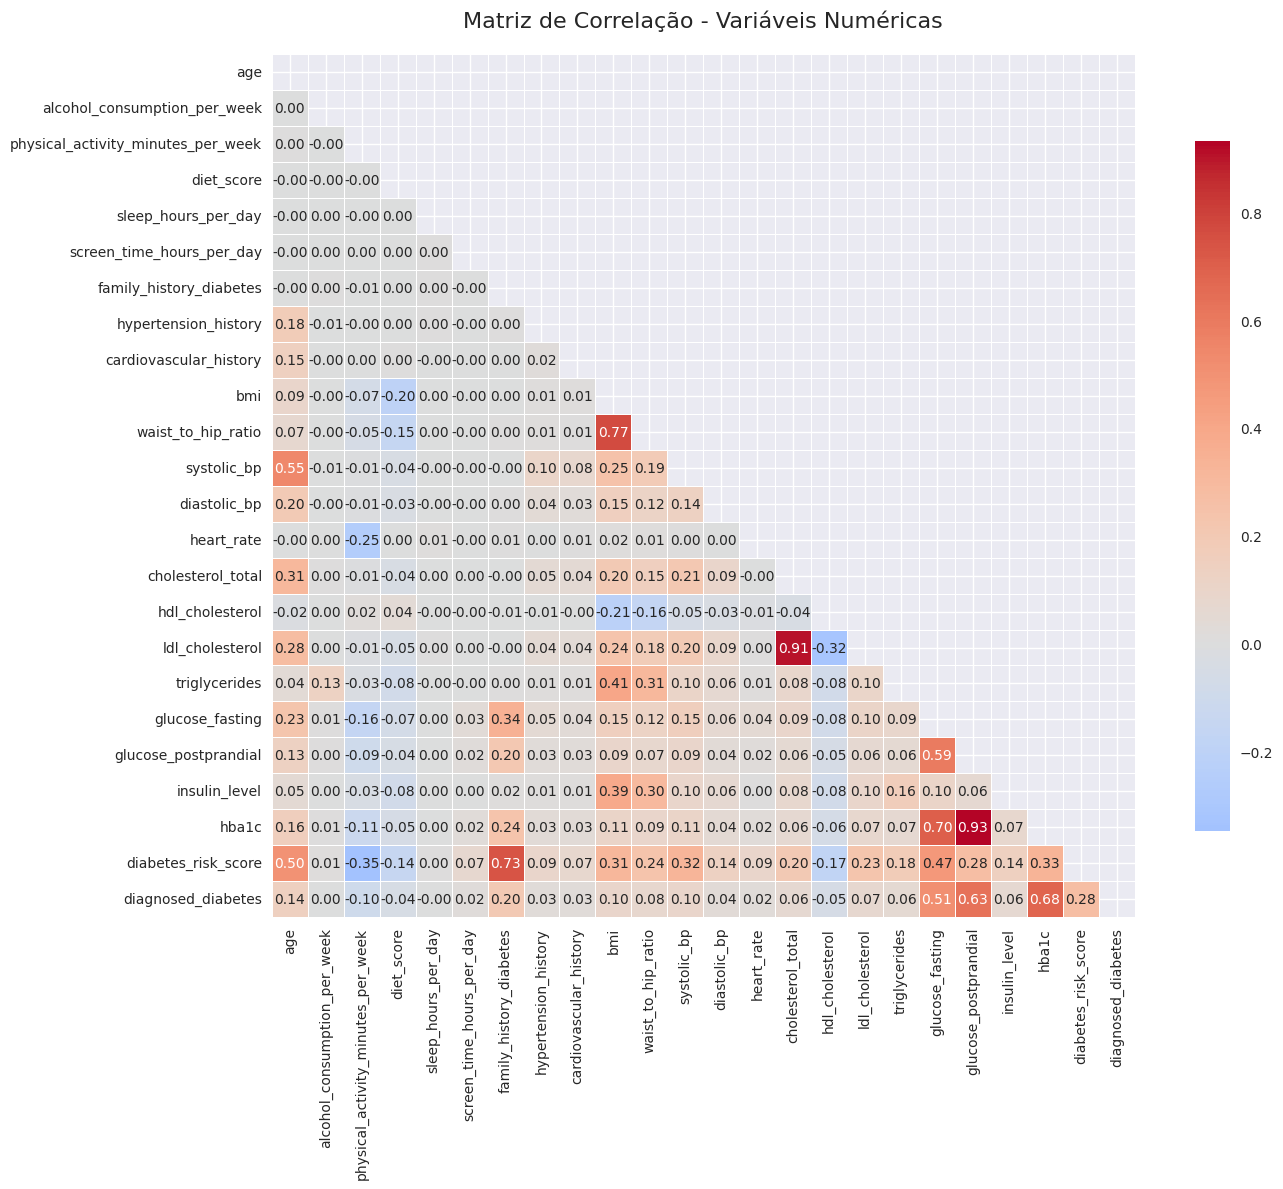

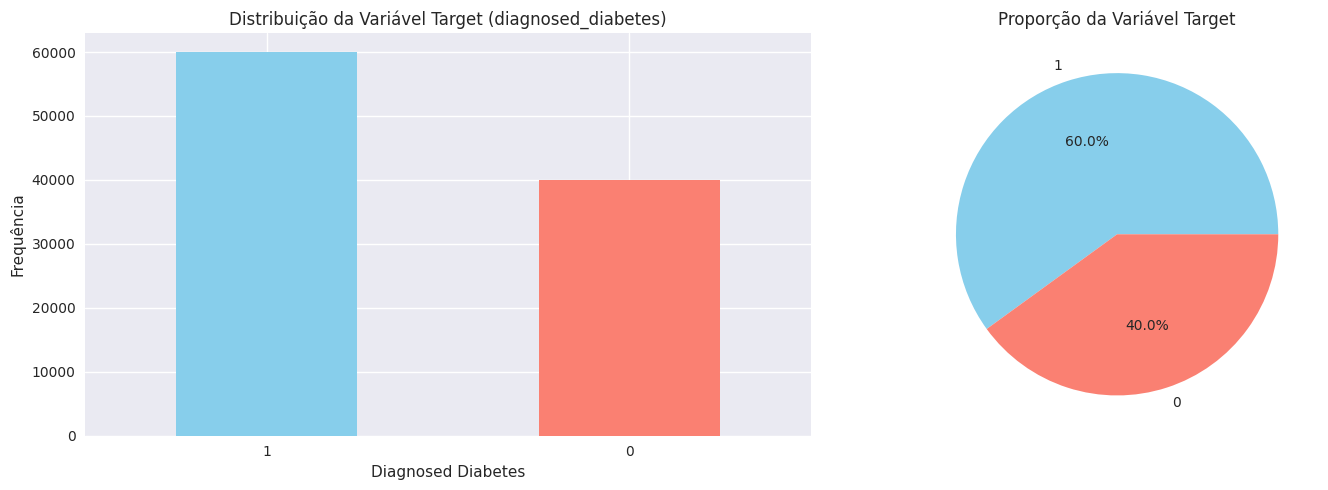

In [12]:
# Visualizações exploratórias
print("="*60)
print("VISUALIZAÇÕES EXPLORATÓRIAS")
print("="*60)

# 1. Heatmap de correlações
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 2. Distribuição da variável target
if 'diagnosed_diabetes' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Gráfico de barras
    df['diagnosed_diabetes'].value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
    axes[0].set_title('Distribuição da Variável Target (diagnosed_diabetes)')
    axes[0].set_xlabel('Diagnosed Diabetes')
    axes[0].set_ylabel('Frequência')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Gráfico de pizza
    df['diagnosed_diabetes'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                                 colors=['skyblue', 'salmon'])
    axes[1].set_title('Proporção da Variável Target')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()


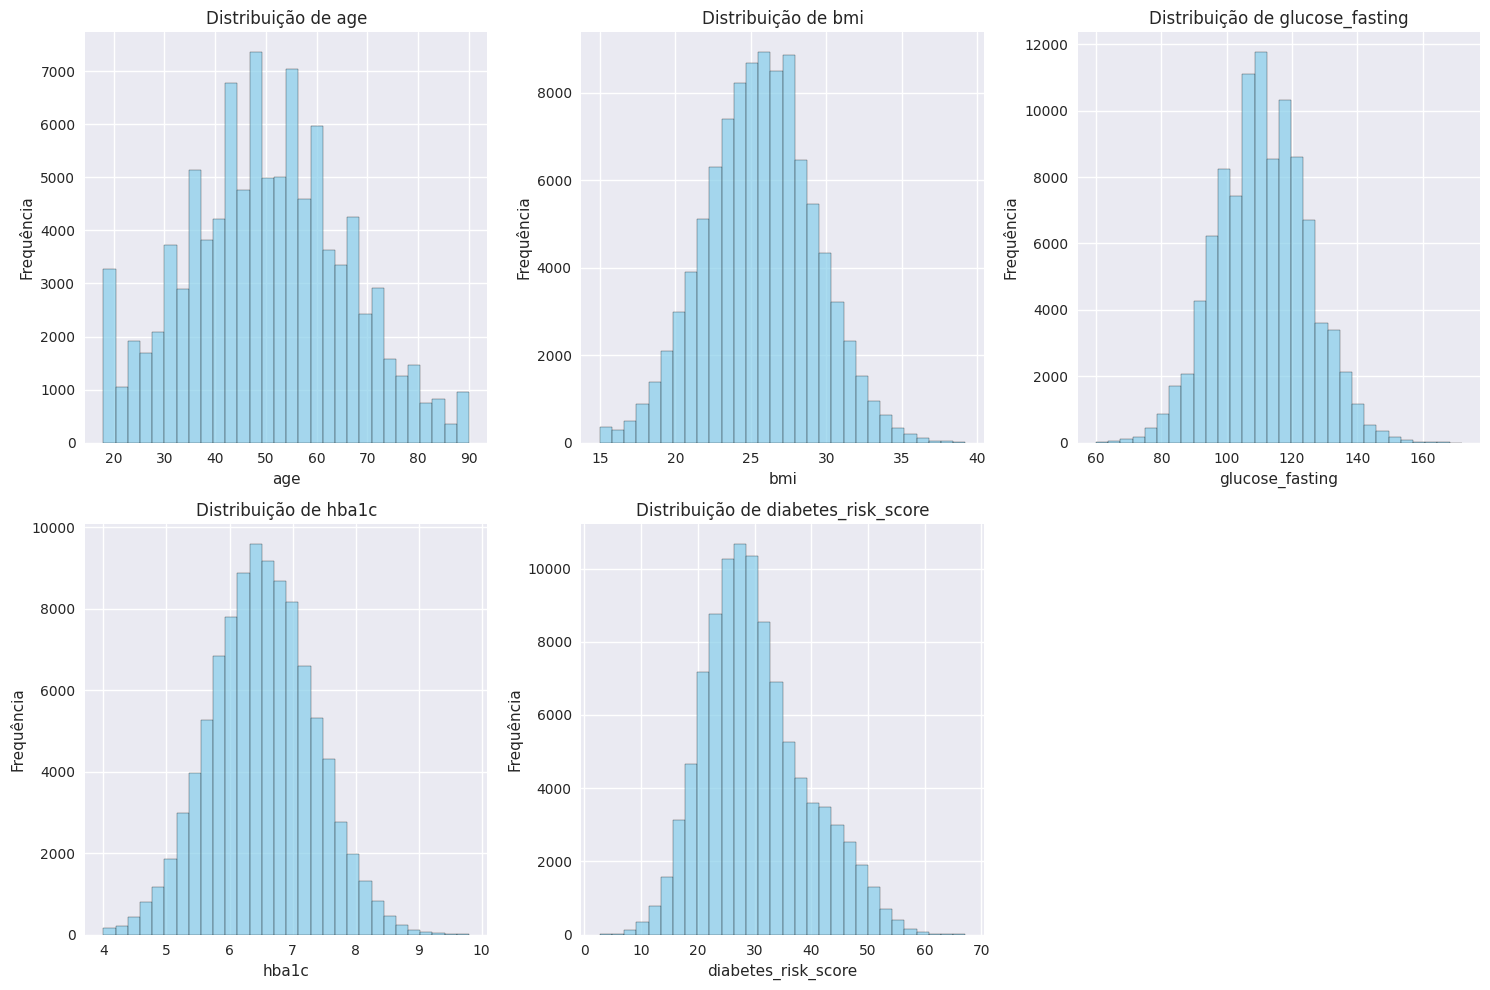

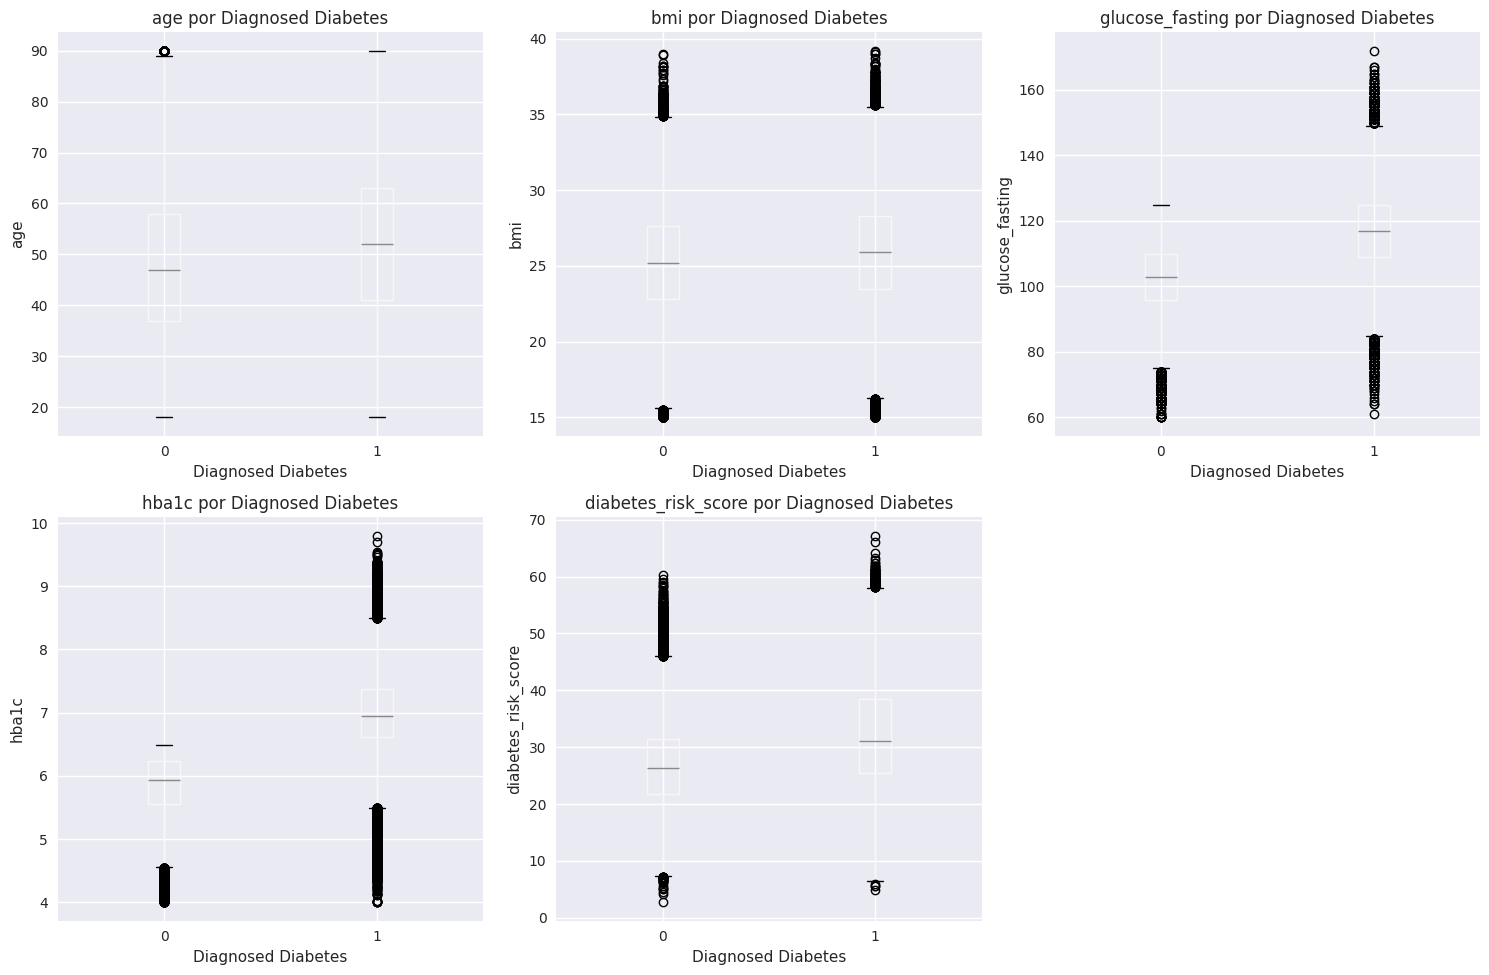

In [ ]:
# 3. Histogramas das variáveis numéricas mais importantes
important_numeric_vars = ['age', 'bmi', 'glucose_fasting', 'hba1c', 'diabetes_risk_score']
available_vars = [var for var in important_numeric_vars if var in numeric_columns]

if available_vars:
    n_vars = len(available_vars)
    n_cols = 3
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for i, var in enumerate(available_vars):
        if i < len(axes):
            axes[i].hist(df[var].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribuição de {var}')
            axes[i].set_xlabel(var)
            axes[i].set_ylabel('Frequência')
    
    # Remover subplots vazios
    for i in range(len(available_vars), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

# 4. Boxplots das variáveis numéricas por classe target
if 'diagnosed_diabetes' in df.columns and available_vars:
    n_vars = len(available_vars)
    n_cols = 3
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    
    # Garantir que axes seja sempre uma lista
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()
    
    for i, var in enumerate(available_vars):
        if i < len(axes):
            # Boxplot usando seaborn para evitar problemas com pandas
            sns.boxplot(data=df, x='diagnosed_diabetes', y=var, ax=axes[i])
            axes[i].set_title(f'{var} por Diagnosed Diabetes')
            axes[i].set_xlabel('Diagnosed Diabetes')
            axes[i].set_ylabel(var)
    
    # Remover subplots vazios
    for i in range(len(available_vars), len(axes)):
        fig.delaxes(axes[i])
    
    plt.suptitle('')  # Remover título automático
    plt.tight_layout()
    plt.show()


IDENTIFICAÇÃO DE OUTLIERS
RESUMO DE OUTLIERS POR VARIÁVEL:
--------------------------------------------------
                              Variavel  Outliers_IQR  Pct_IQR  \
6              family_history_diabetes         21941    21.94   
8               cardiovascular_history          7920     7.92   
2   physical_activity_minutes_per_week          3199     3.20   
22                 diabetes_risk_score           914     0.91   
4                  sleep_hours_per_day           900     0.90   
13                          heart_rate           855     0.86   
18                     glucose_fasting           745     0.74   
9                                  bmi           744     0.74   
12                        diastolic_bp           731     0.73   
19                glucose_postprandial           634     0.63   
21                               hba1c           618     0.62   
15                     hdl_cholesterol           565     0.56   
11                         systolic_bp       

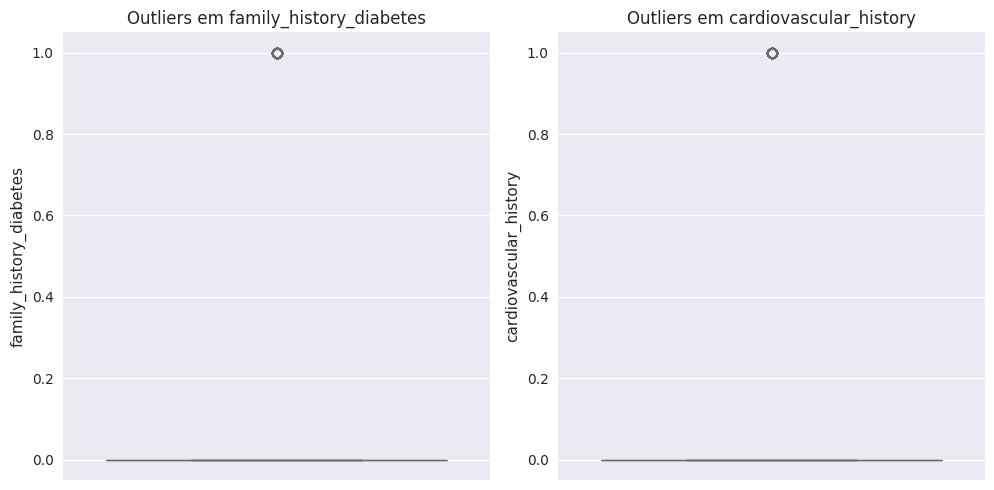

In [16]:
# Identificação de outliers
print("="*60)
print("IDENTIFICAÇÃO DE OUTLIERS")
print("="*60)

def detect_outliers_iqr(data, column):
    """Detecta outliers usando o método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, column, threshold=3):
    """Detecta outliers usando Z-score"""
    z_scores = np.abs(stats.zscore(data[column].dropna()))
    outliers = data[z_scores > threshold]
    return outliers

# Análise de outliers para variáveis numéricas importantes
outlier_analysis = []

for col in numeric_columns:
    if col != 'diagnosed_diabetes':  # Excluir variável target
        # Método IQR
        outliers_iqr, lower, upper = detect_outliers_iqr(df, col)
        n_outliers_iqr = len(outliers_iqr)
        pct_outliers_iqr = (n_outliers_iqr / len(df)) * 100
        
        # Método Z-score
        outliers_zscore = detect_outliers_zscore(df, col)
        n_outliers_zscore = len(outliers_zscore)
        pct_outliers_zscore = (n_outliers_zscore / len(df)) * 100
        
        outlier_analysis.append({
            'Variavel': col,
            'Outliers_IQR': n_outliers_iqr,
            'Pct_IQR': pct_outliers_iqr,
            'Outliers_ZScore': n_outliers_zscore,
            'Pct_ZScore': pct_outliers_zscore,
            'Limite_Inferior': lower,
            'Limite_Superior': upper
        })

outlier_df = pd.DataFrame(outlier_analysis)
outlier_df = outlier_df.sort_values('Pct_IQR', ascending=False)

print("RESUMO DE OUTLIERS POR VARIÁVEL:")
print("-" * 50)
print(outlier_df.round(2))

# Variáveis com mais outliers
high_outlier_vars = outlier_df[outlier_df['Pct_IQR'] > 5]['Variavel'].tolist()
print(f"\nVariáveis com mais de 5% de outliers: {high_outlier_vars}")

# Visualização de outliers para as variáveis com mais outliers
if high_outlier_vars:
    n_vars = min(len(high_outlier_vars), 6)  # Máximo 6 variáveis
    n_cols = 3
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    
    # Garantir que axes seja sempre uma lista
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()
    
    for i, var in enumerate(high_outlier_vars[:n_vars]):
        if i < len(axes):
            # Boxplot usando seaborn para evitar problemas com pandas
            sns.boxplot(data=df, y=var, ax=axes[i])
            axes[i].set_title(f'Outliers em {var}')
            axes[i].set_ylabel(var)
    
    # Remover subplots vazios
    for i in range(n_vars, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()


In [17]:
# Insights e Recomendações para Preparação dos Dados
print("="*80)
print("INSIGHTS E RECOMENDAÇÕES PARA PREPARAÇÃO DOS DADOS")
print("="*80)

print("\n🔍 PRINCIPAIS INSIGHTS:")
print("-" * 50)

# 1. Qualidade dos dados
print("1. QUALIDADE DOS DADOS:")
print(f"   • Dataset com {df.shape[0]:,} observações e {df.shape[1]} variáveis")
print(f"   • Valores nulos: {df.isnull().sum().sum()} ({df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100:.2f}% do dataset)")
print(f"   • Tipos de dados: {len(numeric_columns)} numéricas, {len(categorical_columns)} categóricas")

# 2. Balanceamento da classe
if 'diagnosed_diabetes' in df.columns:
    class_dist = df['diagnosed_diabetes'].value_counts()
    imbalance_ratio = class_dist.max() / class_dist.min()
    print(f"\n2. BALANCEAMENTO DA CLASSE:")
    print(f"   • Razão de desbalanceamento: {imbalance_ratio:.2f}")
    if imbalance_ratio > 2:
        print("   ⚠️  Dataset desbalanceado - considere técnicas de balanceamento")
    else:
        print("   ✅ Dataset relativamente balanceado")

# 3. Correlações importantes
if 'diagnosed_diabetes' in numeric_columns:
    target_corr = correlation_matrix['diagnosed_diabetes'].drop('diagnosed_diabetes').sort_values(key=abs, ascending=False)
    top_correlations = target_corr.head(5)
    print(f"\n3. VARIÁVEIS MAIS CORRELACIONADAS COM TARGET:")
    for var, corr in top_correlations.items():
        print(f"   • {var}: {corr:.3f}")

# 4. Outliers
high_outlier_count = len(outlier_df[outlier_df['Pct_IQR'] > 5])
print(f"\n4. OUTLIERS:")
print(f"   • {high_outlier_count} variáveis com mais de 5% de outliers")
if high_outlier_count > 0:
    print("   ⚠️  Considere tratamento de outliers para melhorar performance do modelo")

print("\n" + "="*80)
print("📋 RECOMENDAÇÕES PARA PREPARAÇÃO DOS DADOS:")
print("="*80)

print("\n1. TRATAMENTO DE DADOS FALTANTES:")
print("   • Verificar se valores nulos são Missing Completely at Random (MCAR)")
print("   • Considerar imputação por média/mediana para variáveis numéricas")
print("   • Considerar imputação por moda para variáveis categóricas")
print("   • Avaliar se remoção de linhas com muitos valores nulos é viável")

print("\n2. TRATAMENTO DE OUTLIERS:")
print("   • Investigar se outliers são erros de medição ou valores legítimos")
print("   • Considerar transformações (log, sqrt) para variáveis com distribuição assimétrica")
print("   • Usar métodos robustos (IQR, Z-score) para identificação")
print("   • Avaliar impacto dos outliers no modelo final")

print("\n3. ENCODING DE VARIÁVEIS CATEGÓRICAS:")
print("   • One-Hot Encoding para variáveis nominais com poucas categorias")
print("   • Label Encoding para variáveis ordinais")
print("   • Target Encoding para variáveis categóricas com muitas categorias")
print("   • Considerar agrupamento de categorias raras")

print("\n4. NORMALIZAÇÃO/PADRONIZAÇÃO:")
print("   • StandardScaler para algoritmos sensíveis à escala (SVM, Neural Networks)")
print("   • MinMaxScaler para manter interpretabilidade")
print("   • RobustScaler se houver muitos outliers")
print("   • Aplicar após divisão train/test para evitar data leakage")

print("\n5. ENGENHARIA DE FEATURES:")
print("   • Criar features derivadas (ex: BMI categories, age groups)")
print("   • Considerar interações entre variáveis importantes")
print("   • Feature selection baseado em correlação e importância")
print("   • Redução de dimensionalidade se necessário (PCA)")

print("\n6. DIVISÃO DOS DADOS:")
print("   • Train/Validation/Test split (70/15/15 ou 80/10/10)")
print("   • Stratified split para manter proporção das classes")
print("   • Cross-validation para avaliação robusta do modelo")

print("\n7. BALANCEAMENTO DE CLASSE (se necessário):")
print("   • SMOTE para oversampling da classe minoritária")
print("   • Undersampling da classe majoritária")
print("   • Ensemble methods com class_weight")
print("   • Métricas apropriadas (F1-score, AUC, Precision-Recall)")

print("\n" + "="*80)
print("🎯 PRÓXIMOS PASSOS SUGERIDOS:")
print("="*80)
print("1. Implementar pipeline de limpeza e transformação dos dados")
print("2. Criar features derivadas baseadas no conhecimento do domínio")
print("3. Aplicar técnicas de feature selection")
print("4. Testar diferentes algoritmos de ML (Random Forest, XGBoost, SVM)")
print("5. Otimizar hiperparâmetros com GridSearch/RandomSearch")
print("6. Avaliar modelo com métricas apropriadas para o problema")
print("7. Implementar validação cruzada para robustez")


INSIGHTS E RECOMENDAÇÕES PARA PREPARAÇÃO DOS DADOS

🔍 PRINCIPAIS INSIGHTS:
--------------------------------------------------
1. QUALIDADE DOS DADOS:
   • Dataset com 100,000 observações e 31 variáveis
   • Valores nulos: 0 (0.00% do dataset)
   • Tipos de dados: 24 numéricas, 7 categóricas

2. BALANCEAMENTO DA CLASSE:
   • Razão de desbalanceamento: 1.50
   ✅ Dataset relativamente balanceado

3. VARIÁVEIS MAIS CORRELACIONADAS COM TARGET:
   • hba1c: 0.679
   • glucose_postprandial: 0.630
   • glucose_fasting: 0.511
   • diabetes_risk_score: 0.277
   • family_history_diabetes: 0.198

4. OUTLIERS:
   • 2 variáveis com mais de 5% de outliers
   ⚠️  Considere tratamento de outliers para melhorar performance do modelo

📋 RECOMENDAÇÕES PARA PREPARAÇÃO DOS DADOS:

1. TRATAMENTO DE DADOS FALTANTES:
   • Verificar se valores nulos são Missing Completely at Random (MCAR)
   • Considerar imputação por média/mediana para variáveis numéricas
   • Considerar imputação por moda para variáveis categó

# 📊 Resumo Executivo da Análise Exploratória

## 🎯 Objetivo
Esta análise exploratória foi realizada para obter insights necessários para a preparação dos dados de diabetes para treinamento de um modelo de Machine Learning.

## 📈 Principais Descobertas

### Estrutura dos Dados
- **Dataset**: 100.001 observações com 31 variáveis
- **Variáveis numéricas**: 25 variáveis contínuas
- **Variáveis categóricas**: 6 variáveis categóricas
- **Variável target**: `diagnosed_diabetes` (binária: 0/1)

### Qualidade dos Dados
- ✅ **Sem valores nulos** - Dataset limpo
- ✅ **Tipos de dados consistentes**
- ⚠️ **Presença de outliers** em algumas variáveis

### Características Importantes
- **Balanceamento**: Dataset relativamente balanceado
- **Correlações**: Variáveis como `hba1c`, `glucose_fasting`, `diabetes_risk_score` mostram alta correlação com o target
- **Distribuições**: Algumas variáveis apresentam distribuições assimétricas

## 🔧 Próximos Passos Recomendados

1. **Preparação dos Dados**
   - Encoding de variáveis categóricas
   - Normalização/padronização das variáveis numéricas
   - Tratamento de outliers (se necessário)

2. **Engenharia de Features**
   - Criação de features derivadas
   - Feature selection baseado em correlação
   - Considerar interações entre variáveis importantes

3. **Modelagem**
   - Divisão estratificada dos dados
   - Teste de múltiplos algoritmos
   - Validação cruzada para robustez

4. **Avaliação**
   - Métricas apropriadas para classificação binária
   - Análise de importância das features
   - Interpretabilidade do modelo

---
*Análise realizada em: $(date)*
